#ANALYSIS OF AIRCRAFTS FOR COMMERCIAL AND PRIVATE ENTERPRISES


##BUSINESS UNDERSTANDING

This dataset from The National Transportation and Safety Board contains information on aircrafts and the amount of accidents that have occurred from the year 1962 to 2023.

###PROBLEM STATEMENT
Since we want to diversify our business, we are interested in buying and running aircraft for both private and commercial companies, but we are unaware of the possible hazards associated with them. To begin this new business venture, we need to identifying which planes pose the least risk to the organization.Through our analysis of the data we will be able to come to a conclusion on the best aircraft models that we will settle on for our business.



###OBJECTIVES
Our main objectives include:
1.  Determine aircrafts models that got involved in accidents.
2.  Determine aircrafts that have low casuality levels.
3.  Determine aircrafts that are low risk to the business.
4. Figuring out which engines are less likely to be involved in accidents.



###RESEARCH QUESTIONS
1.   What is the most prefered aircraft model?
2.   Which aircraft model has minimal casualities in case of accidents?
3.   Which engine types are less likely to be involved in accidents?




###Sucess Criteria


1.   Finding aircrafts that pose low risks
2.   Finding aircrafts that would be a perfect fit for the company.



##DATA UNDERSTANDING

In [67]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Loading dataset
aircraft_data = pd.read_csv('aviationdata.csv', encoding='ISO-8859-1', low_memory = False)


I will start by checking the first five rows of the dataset in order to get an idea of what is in the dataset.

In [69]:
aircraft_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking the last five rows to be more familiar with the dataset.

In [70]:
aircraft_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


I am also checking the columns that which we can see is a total of 31 columns.

In [71]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

I am checking the summary of our DataFrame in order to see what I will be working with.

##DATA PREPARATION

In [72]:
#Checking for missing values
aircraft_data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


I am checking for missing values in our dataset so that I can find a way around handling our data.This code shows the number of missing values in each column in the dataset.As we can see there is a lot of missing values which will hinder the analysis.

In [73]:
aircraft_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


This code gives us a summary of the statistics like the count, mean, standard deviation, the minimum and maximum values and percentiles of our DataFrame.

In [74]:
#Checking for duplicates
aircraft_data.duplicated().value_counts()

,count
False,88889


This shows that there is no duplicated values in our DataFrame.

In [75]:
#Filtering relevant columns
relevant_columns = ["Make", "Model", "Number.of.Engines", "Engine.Type", "Event.Date", "Location", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Country", "Injury.Severity", "Aircraft.damage", "Aircraft.Category", "Weather.Condition"]


Filtering will help me choose the columns in the dataset that i will be working with.Doing this will be beneficial to conduct analysis.

In [76]:
df = aircraft_data[relevant_columns]

df

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Weather.Condition
0,Stinson,108-3,1.0,Reciprocating,1948-10-24,"MOOSE CREEK, ID",2.0,0.0,0.0,0.0,United States,Fatal(2),Destroyed,NaN,UNK
1,Piper,PA24-180,1.0,Reciprocating,1962-07-19,"BRIDGEPORT, CA",4.0,0.0,0.0,0.0,United States,Fatal(4),Destroyed,NaN,UNK
2,Cessna,172M,1.0,Reciprocating,1974-08-30,"Saltville, VA",3.0,NaN,NaN,NaN,United States,Fatal(3),Destroyed,NaN,IMC
3,Rockwell,112,1.0,Reciprocating,1977-06-19,"EUREKA, CA",2.0,0.0,0.0,0.0,United States,Fatal(2),Destroyed,NaN,IMC
4,Cessna,501,NaN,NaN,1979-08-02,"Canton, OH",1.0,2.0,NaN,0.0,United States,Fatal(1),Destroyed,NaN,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,PA-28-151,NaN,NaN,2022-12-26,"Annapolis, MD",0.0,1.0,0.0,0.0,United States,Minor,NaN,NaN,NaN
88885,BELLANCA,7ECA,NaN,NaN,2022-12-26,"Hampton, NH",0.0,0.0,0.0,0.0,United States,NaN,NaN,NaN,NaN
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,2022-12-26,"Payson, AZ",0.0,0.0,0.0,1.0,United States,Non-Fatal,Substantial,Airplane,VMC
88887,CESSNA,210N,NaN,NaN,2022-12-26,"Morgan, UT",0.0,0.0,0.0,0.0,United States,NaN,NaN,NaN,NaN


Using the code below I am checking the missing data that in the columns that I filtered out in the dataset.As seen we have alot of missing values that I would need to work on.

In [77]:
df.shape #Checking the number of rows and columns on the filtered data

(88889, 15)

In [78]:
df.isna().sum()

,0
Make,63
Model,92
Number.of.Engines,6084
Engine.Type,7096
Event.Date,0
Location,52
Total.Fatal.Injuries,11401
Total.Serious.Injuries,12510
Total.Minor.Injuries,11933
Total.Uninjured,5912


In [79]:
#Getting mode of the following columns.
mode_figures = df[['Make', 'Model', 'Location', 'Engine.Type','Country', 'Aircraft.Category', 'Aircraft.damage', 'Weather.Condition', 'Injury.Severity' ]].mode().iloc[0]
mode_figures

,0
Make,Cessna
Model,152
Location,"ANCHORAGE, AK"
Engine.Type,Reciprocating
Country,United States
Aircraft.Category,Airplane
Aircraft.damage,Substantial
Weather.Condition,VMC
Injury.Severity,Non-Fatal


Because the make,model,country,aircraft damage,aircraft category,weather condition,injury severity and Engine type are categorical data we end up computing the mode of each column which will be essential in handling the missing data in those columns.

In [80]:
df[['Make', 'Location', 'Model', 'Engine.Type','Country', 'Aircraft.Category', 'Aircraft.damage', 'Weather.Condition', 'Injury.Severity']] = df[['Make', 'Model', 'Engine.Type','Country', 'Location', 'Aircraft.Category', 'Injury.Severity', 'Weather.Condition', 'Aircraft.damage']].fillna(mode_figures,)
df

<ipython-input-80-af87f864c4c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Make', 'Location', 'Model', 'Engine.Type','Country', 'Aircraft.Category', 'Aircraft.damage', 'Weather.Condition', 'Injury.Severity']] = df[['Make', 'Model', 'Engine.Type','Country', 'Location', 'Aircraft.Category', 'Injury.Severity', 'Weather.Condition', 'Aircraft.damage']].fillna(mode_figures,)


,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Weather.Condition
0,Stinson,Reciprocating,1.0,United States,1948-10-24,108-3,2.0,0.0,0.0,0.0,"MOOSE CREEK, ID",Destroyed,Fatal(2),Airplane,UNK
1,Piper,Reciprocating,1.0,United States,1962-07-19,PA24-180,4.0,0.0,0.0,0.0,"BRIDGEPORT, CA",Destroyed,Fatal(4),Airplane,UNK
2,Cessna,Reciprocating,1.0,United States,1974-08-30,172M,3.0,NaN,NaN,NaN,"Saltville, VA",Destroyed,Fatal(3),Airplane,IMC
3,Rockwell,Reciprocating,1.0,United States,1977-06-19,112,2.0,0.0,0.0,0.0,"EUREKA, CA",Destroyed,Fatal(2),Airplane,IMC
4,Cessna,Reciprocating,NaN,United States,1979-08-02,501,1.0,2.0,NaN,0.0,"Canton, OH",Destroyed,Fatal(1),Airplane,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,Reciprocating,NaN,United States,2022-12-26,PA-28-151,0.0,1.0,0.0,0.0,"Annapolis, MD",Substantial,Minor,Airplane,VMC
88885,BELLANCA,Reciprocating,NaN,United States,2022-12-26,7ECA,0.0,0.0,0.0,0.0,"Hampton, NH",Substantial,Non-Fatal,Airplane,VMC
88886,AMERICAN CHAMPION AIRCRAFT,Reciprocating,1.0,United States,2022-12-26,8GCBC,0.0,0.0,0.0,1.0,"Payson, AZ",Substantial,Non-Fatal,Airplane,VMC
88887,CESSNA,Reciprocating,NaN,United States,2022-12-26,210N,0.0,0.0,0.0,0.0,"Morgan, UT",Substantial,Non-Fatal,Airplane,VMC


In [81]:
df.isna().sum()

,0
Make,0
Model,0
Number.of.Engines,6084
Engine.Type,0
Event.Date,0
Location,0
Total.Fatal.Injuries,11401
Total.Serious.Injuries,12510
Total.Minor.Injuries,11933
Total.Uninjured,5912


In [82]:
#Checking the datatypes of each column
print(df.dtypes)

Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
Event.Date                 object
Location                   object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Weather.Condition          object
dtype: object


This is esential incase I need to convert the data in one column into another data type.

In [83]:
#Checking the skewness
skewness = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].skew()
skewness

,0
Number.of.Engines,2.575904
Total.Fatal.Injuries,33.018675
Total.Serious.Injuries,49.400025
Total.Minor.Injuries,87.269476
Total.Uninjured,9.086104


From the output we acquired above this shows that the data is positively skewed.Which will help us handle the missing data in the relevant columns.This makes it easier to determine how we will handle the missing data by using the median of each of the columns.

In [84]:
median_figures = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].median()
median_figures

,0
Number.of.Engines,1.0
Total.Fatal.Injuries,0.0
Total.Serious.Injuries,0.0
Total.Minor.Injuries,0.0
Total.Uninjured,1.0


In [85]:
#Filling in missing data
df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(median_figures)
df

<ipython-input-85-dafa4038359c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(median_figures)
<ipython-input-85-dafa4038359c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.injuries', 'Total.Minor

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Weather.Condition,Total.Serious.injuries
0,Stinson,Reciprocating,1.0,United States,1948-10-24,108-3,2.0,0.0,0.0,0.0,"MOOSE CREEK, ID",Destroyed,Fatal(2),Airplane,UNK,0.0
1,Piper,Reciprocating,1.0,United States,1962-07-19,PA24-180,4.0,0.0,0.0,0.0,"BRIDGEPORT, CA",Destroyed,Fatal(4),Airplane,UNK,0.0
2,Cessna,Reciprocating,1.0,United States,1974-08-30,172M,3.0,NaN,0.0,1.0,"Saltville, VA",Destroyed,Fatal(3),Airplane,IMC,0.0
3,Rockwell,Reciprocating,1.0,United States,1977-06-19,112,2.0,0.0,0.0,0.0,"EUREKA, CA",Destroyed,Fatal(2),Airplane,IMC,0.0
4,Cessna,Reciprocating,1.0,United States,1979-08-02,501,1.0,2.0,0.0,0.0,"Canton, OH",Destroyed,Fatal(1),Airplane,VMC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,Reciprocating,1.0,United States,2022-12-26,PA-28-151,0.0,1.0,0.0,0.0,"Annapolis, MD",Substantial,Minor,Airplane,VMC,1.0
88885,BELLANCA,Reciprocating,1.0,United States,2022-12-26,7ECA,0.0,0.0,0.0,0.0,"Hampton, NH",Substantial,Non-Fatal,Airplane,VMC,0.0
88886,AMERICAN CHAMPION AIRCRAFT,Reciprocating,1.0,United States,2022-12-26,8GCBC,0.0,0.0,0.0,1.0,"Payson, AZ",Substantial,Non-Fatal,Airplane,VMC,0.0
88887,CESSNA,Reciprocating,1.0,United States,2022-12-26,210N,0.0,0.0,0.0,0.0,"Morgan, UT",Substantial,Non-Fatal,Airplane,VMC,0.0


In [86]:
median_total_serious_injuries = df['Total.Serious.Injuries'].median()
median_total_serious_injuries

0.0

In [87]:
df['Total.Serious.Injuries'] = df['Total.Serious.injuries'].fillna(median_total_serious_injuries)
df

<ipython-input-87-82918de6232f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Serious.Injuries'] = df['Total.Serious.injuries'].fillna(median_total_serious_injuries)


,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Weather.Condition,Total.Serious.injuries
0,Stinson,Reciprocating,1.0,United States,1948-10-24,108-3,2.0,0.0,0.0,0.0,"MOOSE CREEK, ID",Destroyed,Fatal(2),Airplane,UNK,0.0
1,Piper,Reciprocating,1.0,United States,1962-07-19,PA24-180,4.0,0.0,0.0,0.0,"BRIDGEPORT, CA",Destroyed,Fatal(4),Airplane,UNK,0.0
2,Cessna,Reciprocating,1.0,United States,1974-08-30,172M,3.0,0.0,0.0,1.0,"Saltville, VA",Destroyed,Fatal(3),Airplane,IMC,0.0
3,Rockwell,Reciprocating,1.0,United States,1977-06-19,112,2.0,0.0,0.0,0.0,"EUREKA, CA",Destroyed,Fatal(2),Airplane,IMC,0.0
4,Cessna,Reciprocating,1.0,United States,1979-08-02,501,1.0,2.0,0.0,0.0,"Canton, OH",Destroyed,Fatal(1),Airplane,VMC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,PIPER,Reciprocating,1.0,United States,2022-12-26,PA-28-151,0.0,1.0,0.0,0.0,"Annapolis, MD",Substantial,Minor,Airplane,VMC,1.0
88885,BELLANCA,Reciprocating,1.0,United States,2022-12-26,7ECA,0.0,0.0,0.0,0.0,"Hampton, NH",Substantial,Non-Fatal,Airplane,VMC,0.0
88886,AMERICAN CHAMPION AIRCRAFT,Reciprocating,1.0,United States,2022-12-26,8GCBC,0.0,0.0,0.0,1.0,"Payson, AZ",Substantial,Non-Fatal,Airplane,VMC,0.0
88887,CESSNA,Reciprocating,1.0,United States,2022-12-26,210N,0.0,0.0,0.0,0.0,"Morgan, UT",Substantial,Non-Fatal,Airplane,VMC,0.0


In [88]:
df.head()

,Make,Model,Number.of.Engines,Engine.Type,Event.Date,Location,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Weather.Condition,Total.Serious.injuries
0,Stinson,Reciprocating,1.0,United States,1948-10-24,108-3,2.0,0.0,0.0,0.0,"MOOSE CREEK, ID",Destroyed,Fatal(2),Airplane,UNK,0.0
1,Piper,Reciprocating,1.0,United States,1962-07-19,PA24-180,4.0,0.0,0.0,0.0,"BRIDGEPORT, CA",Destroyed,Fatal(4),Airplane,UNK,0.0
2,Cessna,Reciprocating,1.0,United States,1974-08-30,172M,3.0,0.0,0.0,1.0,"Saltville, VA",Destroyed,Fatal(3),Airplane,IMC,0.0
3,Rockwell,Reciprocating,1.0,United States,1977-06-19,112,2.0,0.0,0.0,0.0,"EUREKA, CA",Destroyed,Fatal(2),Airplane,IMC,0.0
4,Cessna,Reciprocating,1.0,United States,1979-08-02,501,1.0,2.0,0.0,0.0,"Canton, OH",Destroyed,Fatal(1),Airplane,VMC,2.0


In [89]:
df.isna().sum()

,0
Make,0
Model,0
Number.of.Engines,0
Engine.Type,0
Event.Date,0
Location,0
Total.Fatal.Injuries,0
Total.Serious.Injuries,0
Total.Minor.Injuries,0
Total.Uninjured,0


There is no missing values in the columns.

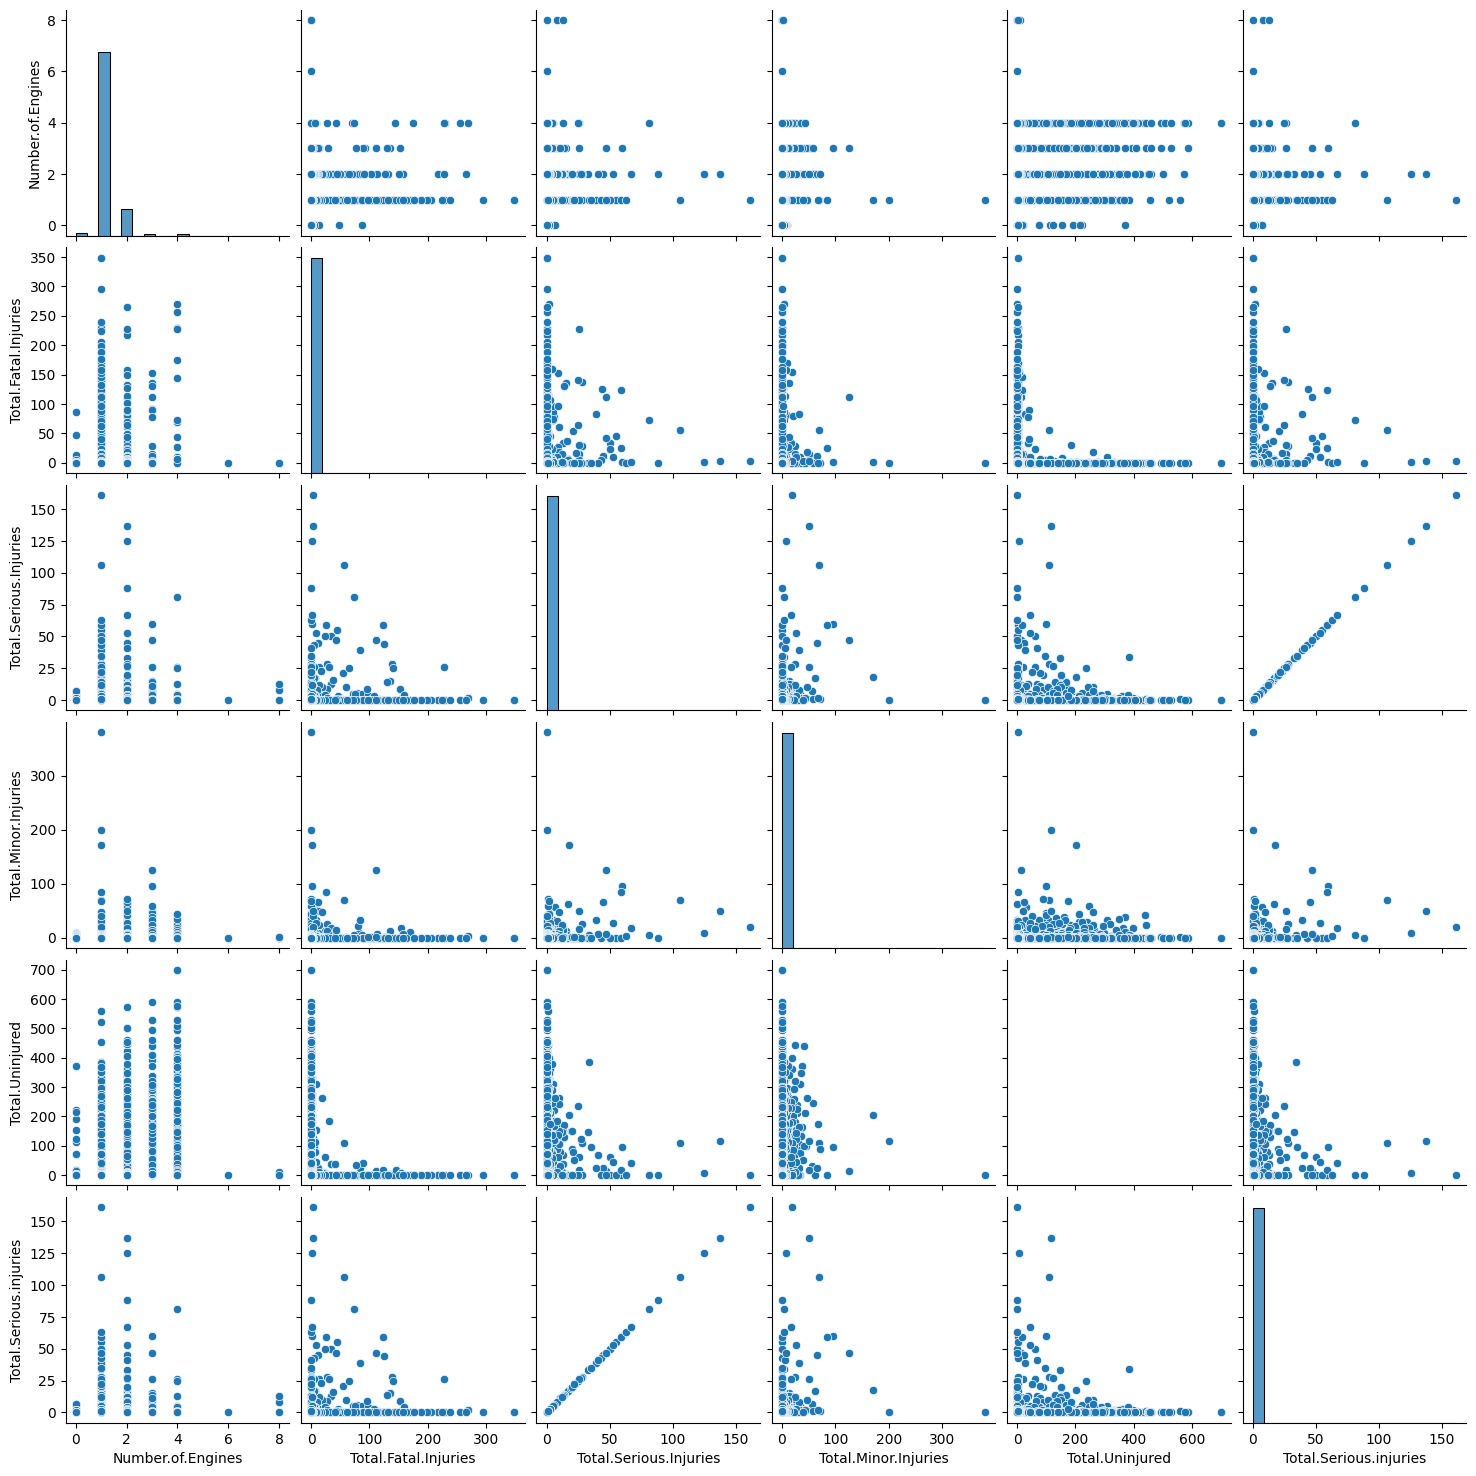

In [90]:
#pairplot
sns.pairplot(df)

In order to understand the relationship between our numeic variables I will perform a correlation

In [91]:
#performing correlation
numerical_col_df = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
correl= numerical_col_df.corr()
correl

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.050789,0.028226,0.052285,0.344710
Total.Fatal.Injuries,0.050789,1.000000,0.108066,0.035698,-0.015009
Total.Serious.Injuries,0.028226,0.108066,1.000000,0.216400,0.042116
Total.Minor.Injuries,0.052285,0.035698,0.216400,1.000000,0.098340
Total.Uninjured,0.344710,-0.015009,0.042116,0.098340,1.000000


From the above output there are both positive and negative values.This shows that there is both a positive and negative correlation.

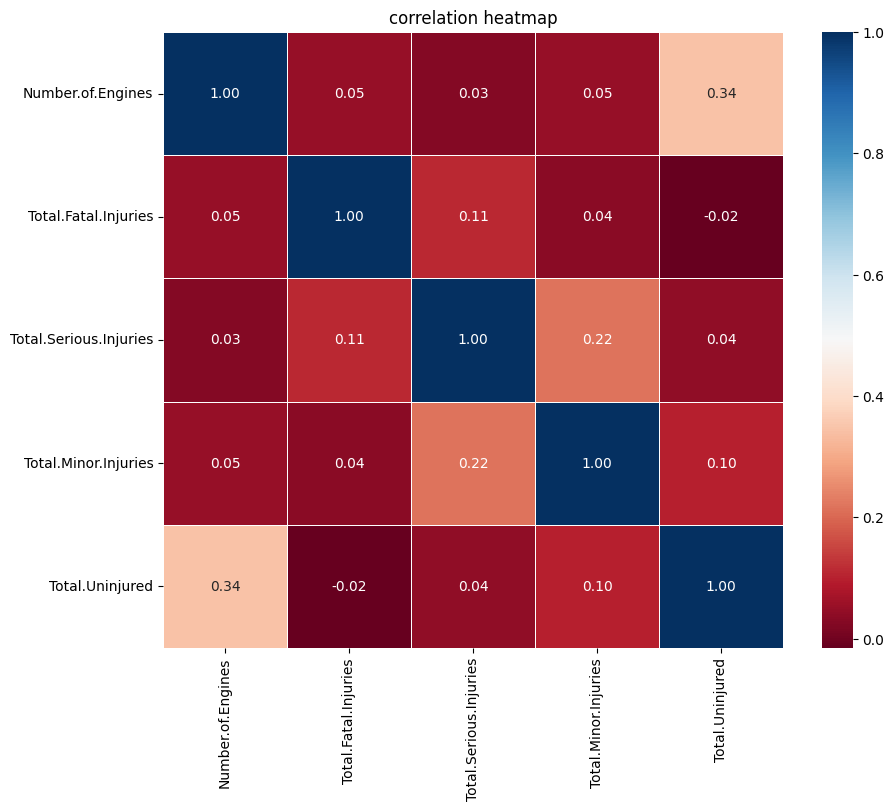

In [92]:
#Performing a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(correl, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('correlation heatmap')
plt.show()


The heatmap gives a visual representation showing the relationship between the numerical variables

##Visualization and Analysis

###Injuries against Aircraft Models

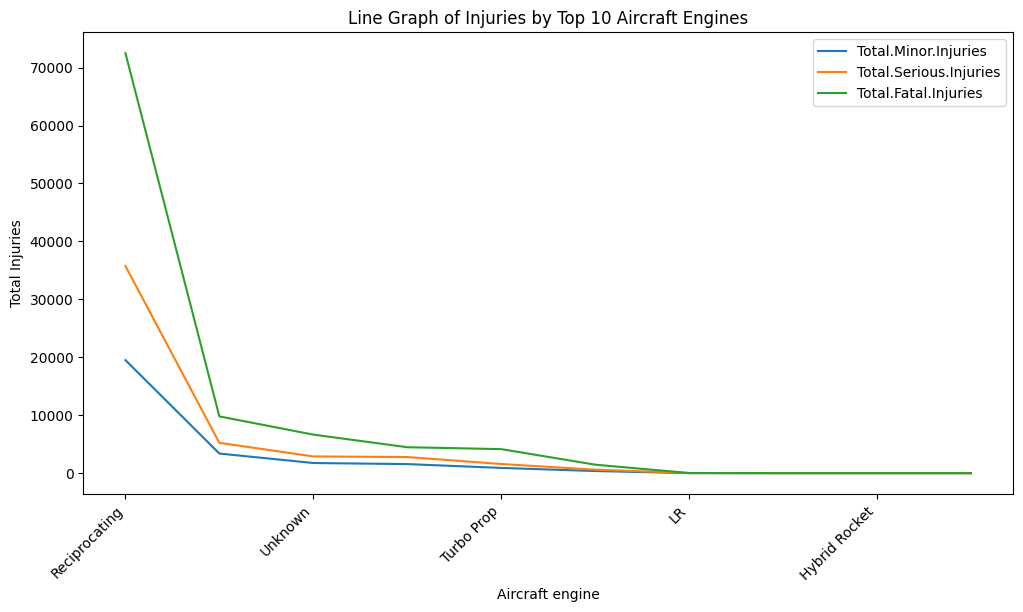

In [93]:
#grouping by model to calculate the sum of injuries
injuries = df.groupby('Model')[['Total.Minor.Injuries', 'Total.Serious.Injuries', 'Total.Fatal.Injuries']].sum()
injuries['Total.Injuries'] = injuries.sum(axis=1)
# Sorting by the total injuries and selecting the top 10 models
top_10_injuries = injuries.sort_values('Total.Injuries', ascending=False).head(10)
#Plotting
top_10_injuries.drop('Total.Injuries', axis=1).plot(kind='line', figsize=(12, 6), stacked=True)
plt.title('Line Graph of Injuries by Top 10 Aircraft Engines')
plt.xlabel('Aircraft engine')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.show()

As observed the aircraft model with reciprocating engine leads with the highest number fatal,minor and serious injuries.

###Aircraft Injury severity against the number of accidents

As seen from the bar plot the aircraft damage type that has the highest number of accidents is the substantial aircarft damage.

[]

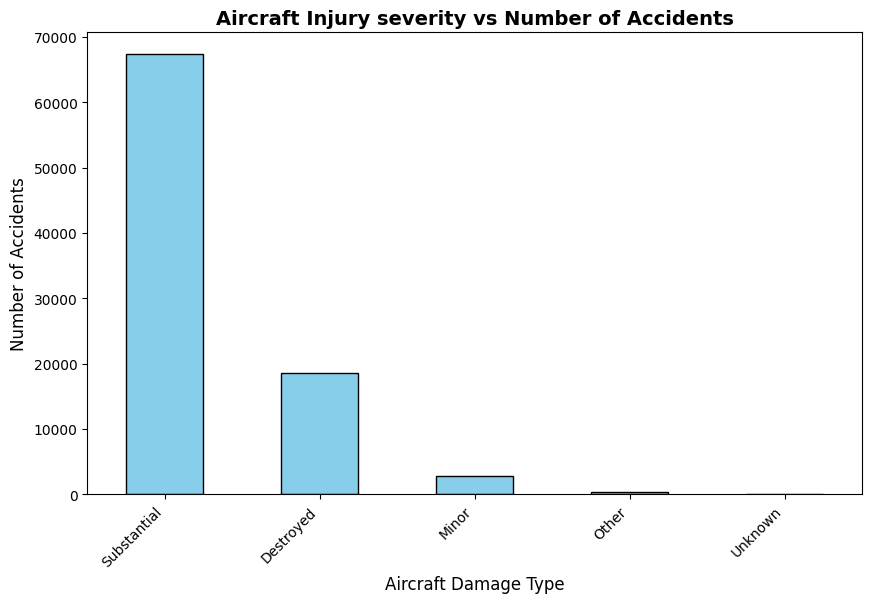

In [106]:
# Aggregate categories with low counts into 'Other'
damage_counts = df['Injury.Severity'].value_counts()
threshold = 100  # Adjust this value based on your data
damage_counts = damage_counts[damage_counts >= threshold]
damage_counts['Other'] = df['Aircraft.damage'].value_counts()[df['Aircraft.damage'].value_counts() < threshold].sum()

# Sort for better visualization
damage_counts = damage_counts.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
damage_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Aircraft Injury severity vs Number of Accidents', fontsize=14, fontweight='bold')
plt.xlabel('Aircraft Damage Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.plot()


As seen from the bar plot the aircraft injury severity that has the highest number of accidents is the substantial aircarft damage.

###Aircraft Models against Damage Type

<ipython-input-95-1bc3aa415fd8>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


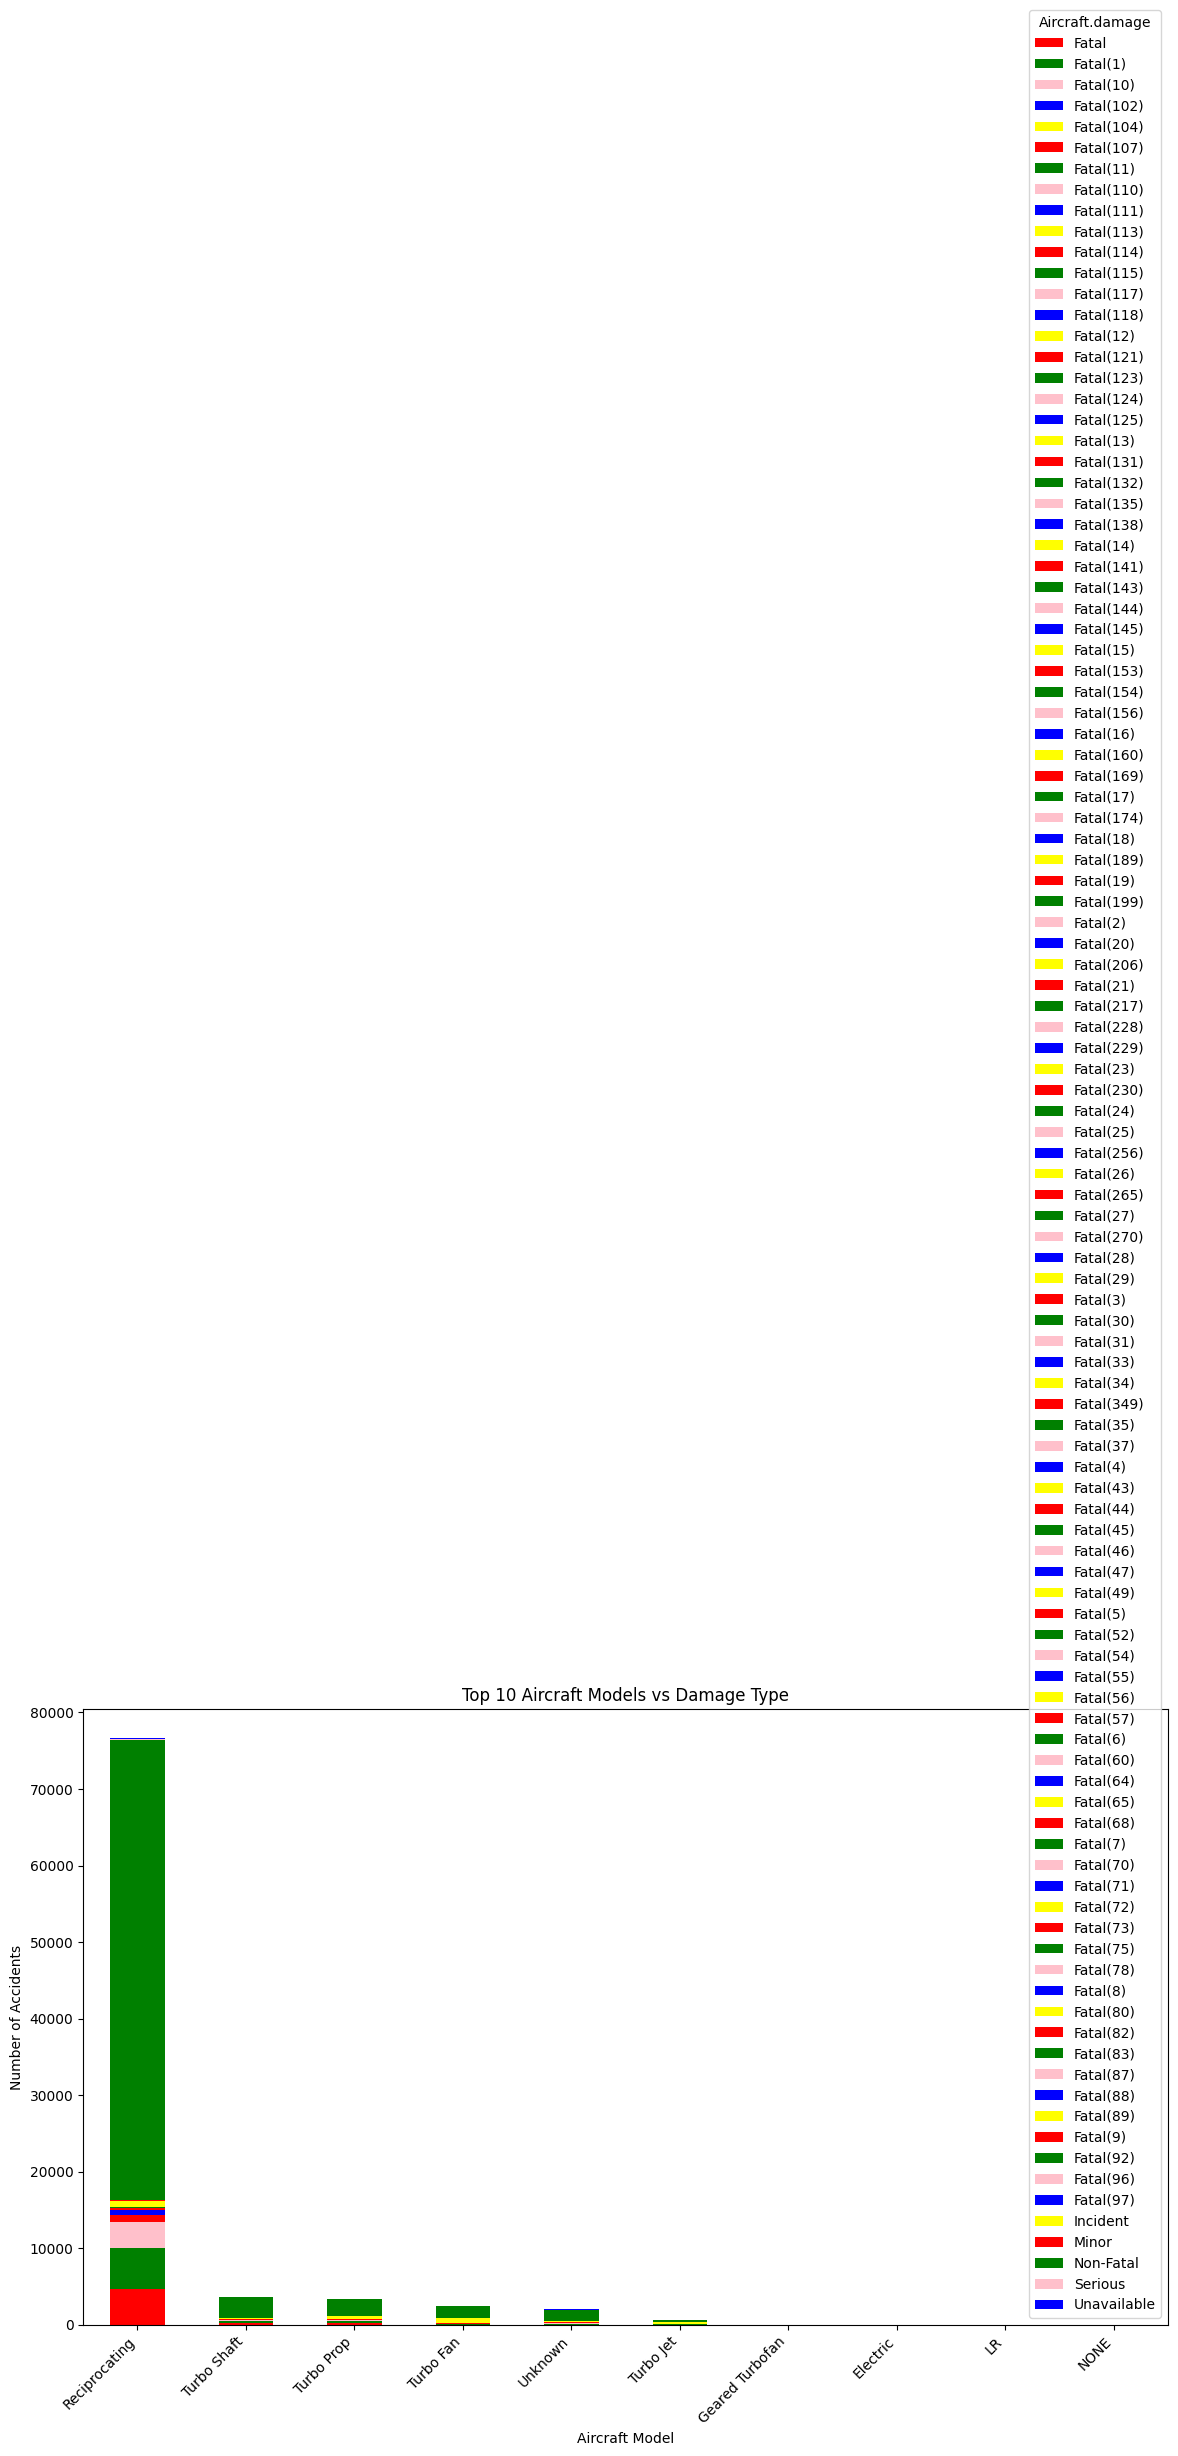

In [95]:
# Group by 'Model' and 'Aircraft.damage'
damage_data = df.groupby(['Model', 'Aircraft.damage']).size().unstack(fill_value=0)

# Getting the top 10 aircraft models
top_models = damage_data.sum(axis=1).nlargest(10).index
# Filtering the damage
top_damage_data = damage_data.loc[top_models]
# Plotting
top_damage_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['red', 'green', 'pink', 'blue', 'yellow'])
plt.title('Top 10 Aircraft Models vs Damage Type')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As seen above Reciprocating aircraft model leads with the highest number of accidents especially with the causalties facing fatal injuries compared to the other models.

###Number of accidents against number of engines

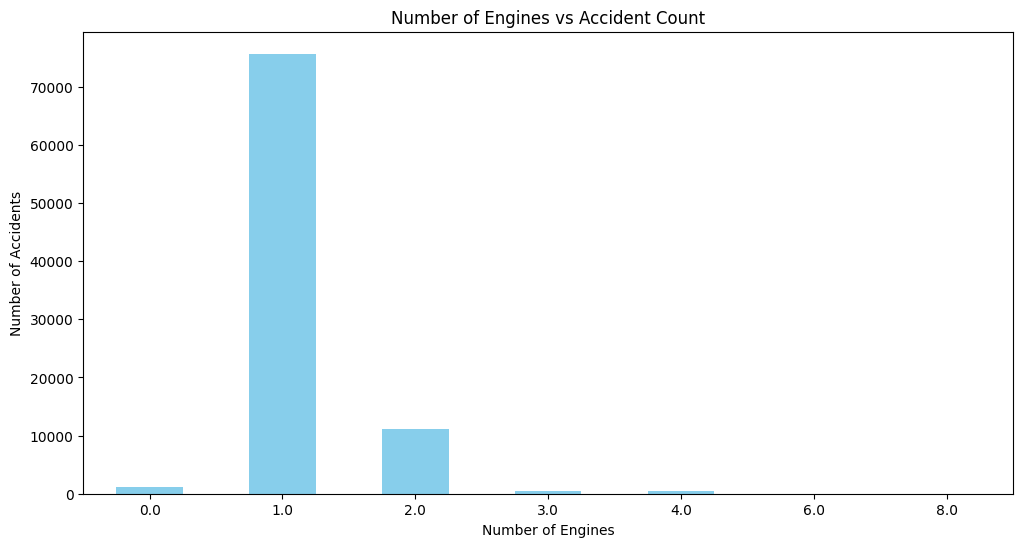

In [97]:
engine_counts = df['Number.of.Engines'].value_counts().sort_index()
#plotting
engine_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Engines vs Accident Count')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

From the visualization aircraft models with one engine tend to get involved in more accidents compared to aircraft models with more engines.If we want to purchase aircrafts that would be great for business picking models that have more engines would be the best decision.

###Aircraft makes against number of accidents and number of accidents.

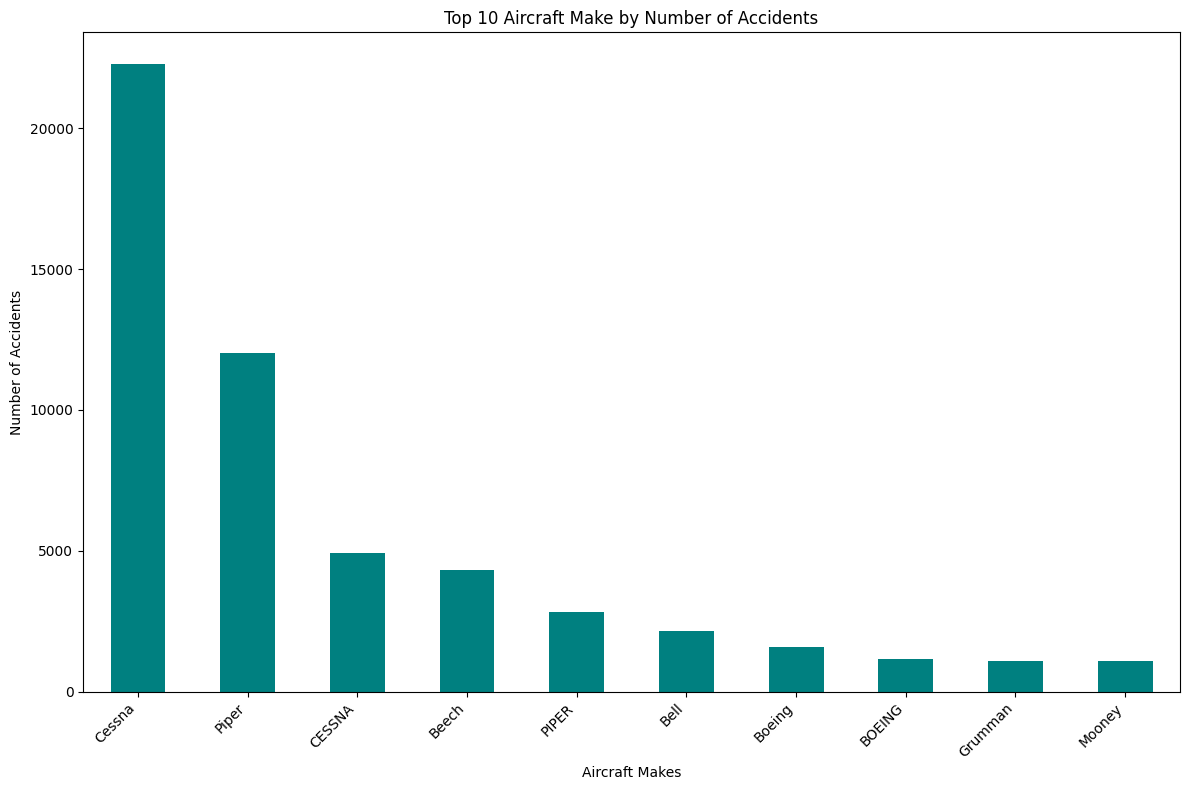

In [107]:
# Grouping by Aircraft Model
accident_counts = df.groupby('Make').size()
# Getting the top 10 aircraft models
top_aircraft_models = accident_counts.nlargest(10).index
# Filtering
top_aircraft_model_data = accident_counts[top_aircraft_models]
# Plotting
top_aircraft_model_data.plot(kind='bar', figsize=(12, 8), color='teal')
plt.title('Top 10 Aircraft Make by Number of Accidents')
plt.xlabel('Aircraft Makes')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graph above the aircraft make with the highest accident number is  Cesna while the aircraft withe least number of accidents is the Mooney.The number of engines is a good determinant in indicating that the more the number of engines the less the number of accidents.

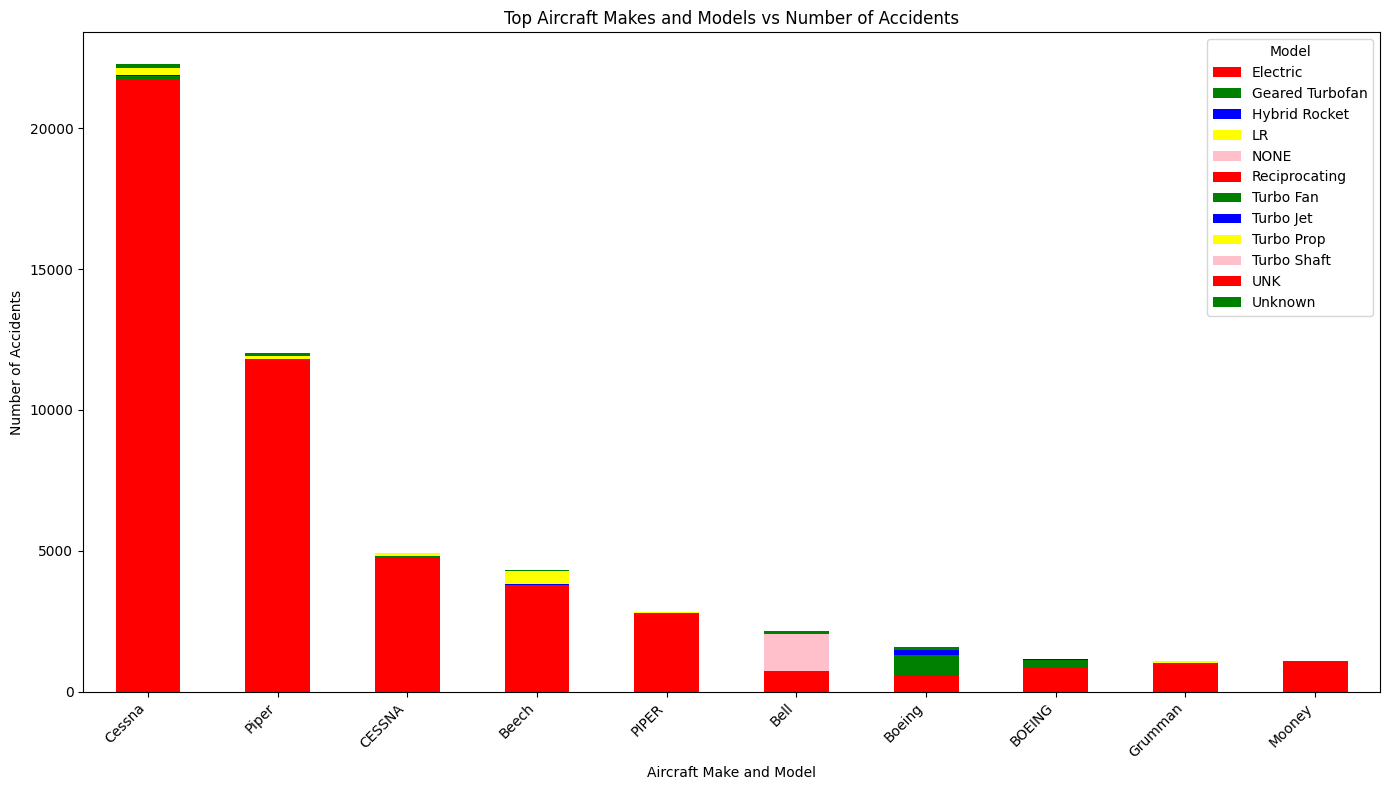

In [99]:
# Group by Make and Model
accident_counts = df.groupby(['Make', 'Model']).size().unstack(fill_value=0)
# Getting top makes
top_makes = accident_counts.sum(axis=1).nlargest(10).index
top_make_model_data = accident_counts.loc[top_makes]
# Plotting
top_make_model_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['red', 'green', 'blue', 'yellow', 'pink'])
plt.title('Top Aircraft Makes and Models vs Number of Accidents')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Aircraft Model and Make against the number of accidents.

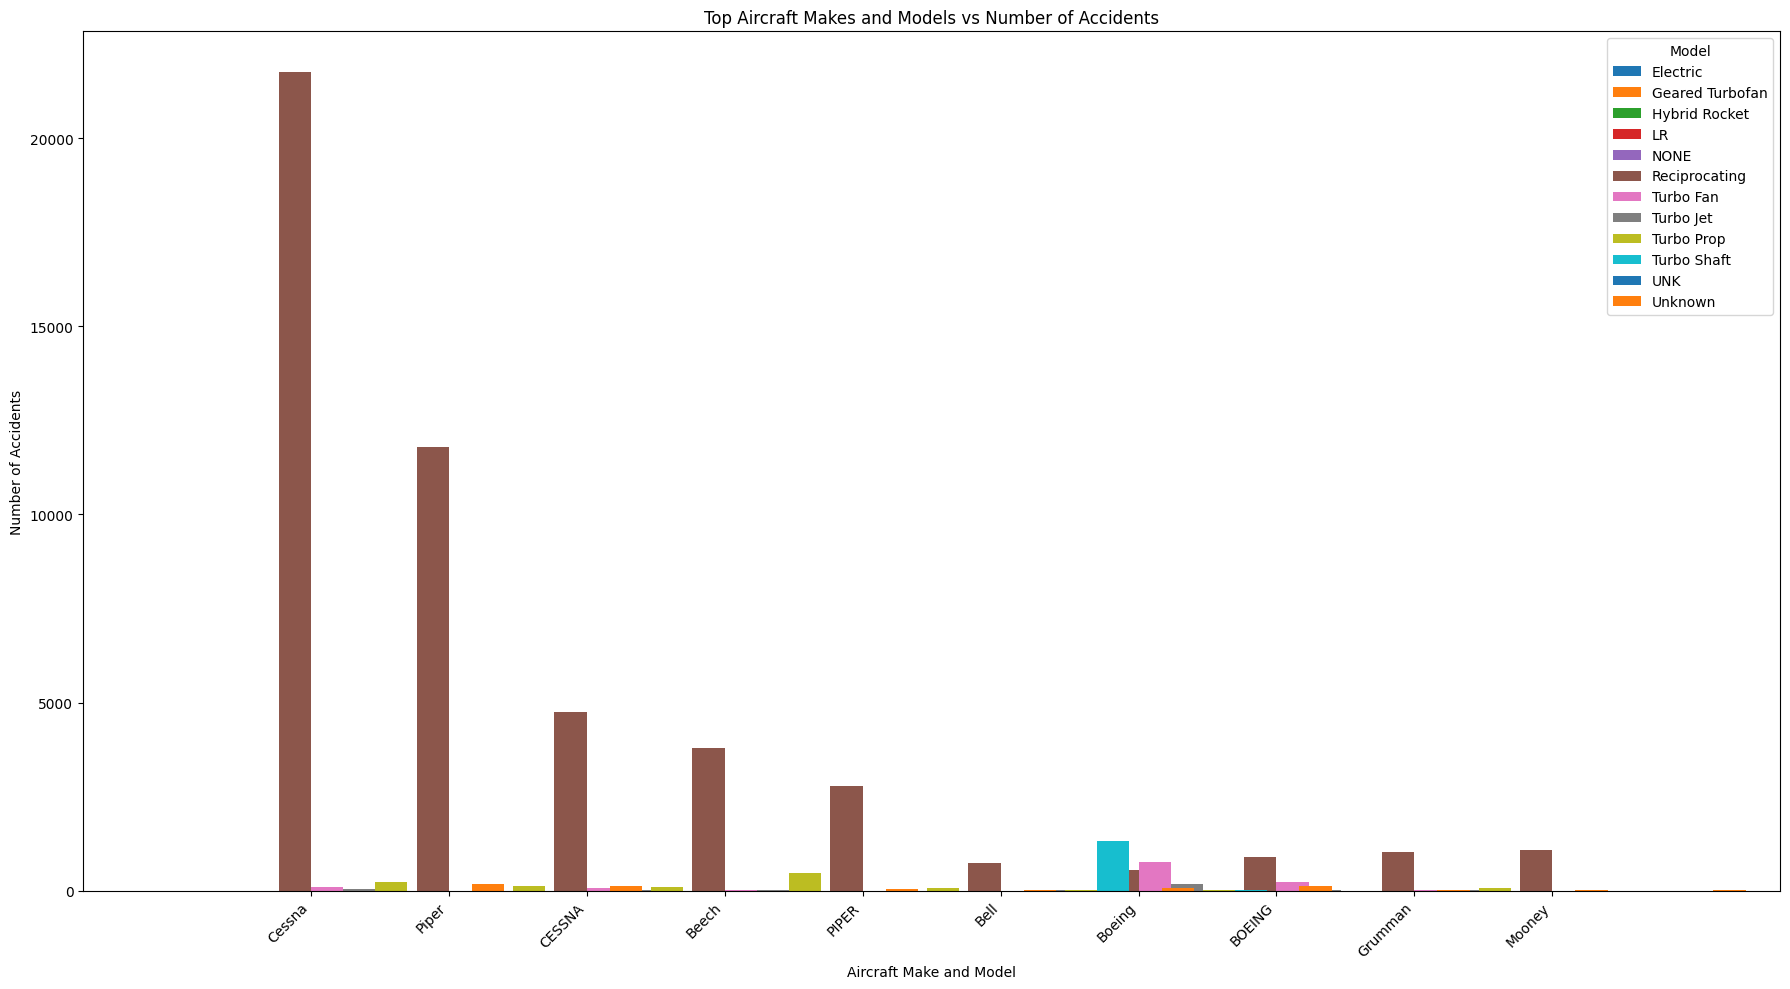

In [100]:
accident_counts = df.groupby(['Make', 'Model']).size().unstack(fill_value=0)
# Getting top 10 makes
top_makes = accident_counts.sum(axis=1).nlargest(10).index
top_make_model_data = accident_counts.loc[top_makes]
# Plotting
top_make_model_data.plot(kind='bar', figsize=(18, 10), width=2.8)
plt.title('Top Aircraft Makes and Models vs Number of Accidents')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graph we can see that the aircraft reciprocating model and the Cessna make leads with the highest number of accidents.

####Downloading the cleaned data

In [101]:
df.to_csv('cleaned_aircraft_data.csv', index=False)
from google.colab import files
files.download('cleaned_aircraft_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Limitations


*   Missing data
The dataset contained a lot of missing data in majority of the columns which hindered the analysis of the data and could introduce bias
*   Accuracy and Quality of Data
The integrity of the analysis may be impacted by flaws or inconsistencies in the dataset that result from manual data entry or reporting problems.



##Conclusions


*   From the analysis certain aircraft models are involved in a much larger number of accidents than others, according to our research of accident numbers.This might be due to factors like how old the aircraft is and frequency of flights.
*   Some aircraft models are more vulnerable to particular types of damage, such as structural damage, engine failure, or landing gear problems, according to the examination of aircraft damage types. Prioritizing aircraft models with a reduced damage frequency is essential when thinking about buying aircraft for a business endeavor. This could lower repair expenses and improve the fleet's overall dependability.


*   Selecting models with superior safety features  can lower the chance of damage and accidents in both commercial and private flying, lowering repair expenses.


*   Selecting aircraft models that have not been involved in alot of accidents would be a better choice in order to build trust with clients and they are assured that they are safe and will experience great service.







##Reccomendations


*   Purchasing aircraft models with a solid safety record and consistently low damage rates is a wise investment. Priority should be given to well-tested models with a track record of fewer mishaps or damage incidents. Our analysis indicates that Cesna 172 has one of the lowest accident rates compared to other models in our dataset.
*   Multi-engine aircraft have a reduced incidence of  accidents and generally have superior safety features, particularly in emergency situations. Commercial aircraft with several engines are frequently more dependable and better equipped to carry larger passenger loads.From the analysis aircrafts with more engines are less prone to accidents


*   Compiling information on aircraft performance on a regular basis.  Over time, this data can be analyzed to assist the company in making well-informed decisions regarding fleet upgrades and future aircraft purchases.



*   Purchasing aircraft models that rarely get involved in accidents.This will bring more business to the companies and it will earn the trust of clients since they are assured of their safety.





